In [1]:
%matplotlib inline 


In [2]:
import matplotlib
import numpy as np
import math

# # epsilon-greedy

In [3]:
#define the bandit class where m is the unknown (for the agent) mean value of return

In [4]:
class Bandit():
    def __init__(self,m):
        self.m = m  # return of the bandit
        self.mean = 0 # mean return 
        self.N =0 # number of times the bandit was pulled
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self,x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N * x

In [5]:
def run_experiment(m1,m2,m3,epsilon,N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N) # number of trial pulls
    
    for i in range(N):
        p = np.random.random()
        if p < epsilon:
            j = np.random.choice(3) # if we are within epsilon we pull at random
        else:
            j = np.argmax([b.mean for b in bandits]) # else we pull the greedy bandit
        x = bandits[j].pull() # the outcome of the pull
        bandits[j].update(x) # we update the chosen bandit's mean
        
        #for the overall plot
        data[i]=x
    for b in bandits:
        print(b.mean)
        
    cumulative_average = np.cumsum(data)/(np.arange(N)+1)
    
    matplotlib.pyplot.plot(cumulative_average)
    matplotlib.pyplot.plot(np.ones(N)*m1)
    matplotlib.pyplot.plot(np.ones(N)*m2)
    matplotlib.pyplot.plot(np.ones(N)*m3)
    matplotlib.pyplot.xscale('log')
    matplotlib.pyplot.show()
    
    return cumulative_average


0.9849166681587138
2.0243902913812324
2.9983907374337377


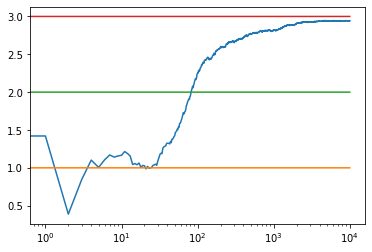

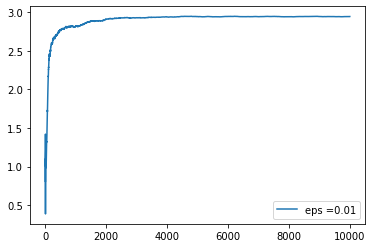

In [8]:
c_01 = run_experiment(1.0,2.0,3.0, 0.05,10000)
matplotlib.pyplot.plot(c_01, label='eps =0.01')
matplotlib.pyplot.legend()

# Optimistic initial values

if the initial values are higher than practically possible, I will be correcting the mean downwards so I will be forced to choose the other bandits that have not been corrected too. We set the upper limit (initial mean) to be higher than the maximum return of the bandits.

In [9]:
class Bandit_opt():
    def __init__(self, m, upper_limit):
        self.m = m  # return of the bandit
        self.mean = upper_limit # mean return 
        self.N =0 # number of times the bandit was pulled
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self,x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N * x

In [10]:
def run_experiment_opt(m1,m2,m3,N,upper_limit):
    bandits = [Bandit_opt(m1,upper_limit), Bandit_opt(m2,upper_limit), Bandit_opt(m3,upper_limit)]
    data = np.empty(N) # number of trial pulls
    
    for i in range(N):
        j = np.argmax([b.mean for b in bandits]) # else we pull the greedy bandit
        x = bandits[j].pull() # the outcome of the pull
        bandits[j].update(x) # we update the chosen bandit's mean
        
        #for the overall plot
        data[i]=x
    for b in bandits:
        print(b.mean)
        
    cumulative_average = np.cumsum(data)/(np.arange(N)+1)
    
    matplotlib.pyplot.plot(cumulative_average)
    matplotlib.pyplot.plot(np.ones(N)*m1)
    matplotlib.pyplot.plot(np.ones(N)*m2)
    matplotlib.pyplot.plot(np.ones(N)*m3)
    matplotlib.pyplot.xscale('log')
    matplotlib.pyplot.show()
    
    return cumulative_average

1.5652048230863604
-0.15455932901274183
2.9980046265150966


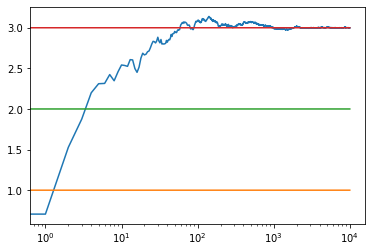

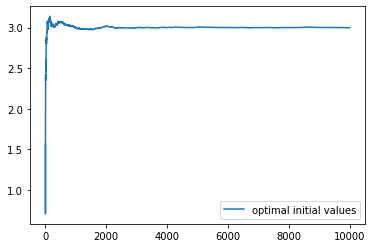

In [11]:
c_01 = run_experiment_opt(1.0,2.0,3.0,10000,10)
matplotlib.pyplot.plot(c_01,label='optimal initial values')
matplotlib.pyplot.legend()

# UCB1

Confidence bounds. The more samples we take, the stricter the range of certainty becomes. Confidence increases.
It is demonstrated by th eChernoff-Hoeffding bound:
P(|X - μ| >= e) <= 2 exp(-2 e^2 N)

It turns out that we have to schose epsilon to be sqrt(2*ln(N)/Nj)
where N is the total number of times I played and Nj the number of times I played bandit j.
It works by being greedy with respect to the upper bound of the sample mean,
Xucb = Xj + sqrt(2*ln(N)/Nj)

if Nj small then the upper bound is high.
ln(N) grows more slowly than Nj so all upper bounds will shrink as I play more and more, so it converges to sample means which will be greedy.

We can add a small number to the denominator in case Nj is zero

In [58]:
class Bandit_ucb():
    def __init__(self, m, upper_limit):
        self.m = m  # return of the bandit
        self.mean = upper_limit # mean return 
        self.N = 0.1 # number of times the bandit was pulled
    
    def pull(self):
        return np.random.randn() + self.m # mean m but action returns a gaussian around it
    
    def update(self,x):
        self.N = math.floor(self.N) + 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N * x

In [59]:
def run_experiment_ucb(m1,m2,m3,N,upper_limit):
    bandits = [Bandit_ucb(m1,upper_limit), Bandit_ucb(m2,upper_limit), Bandit_ucb(m3,upper_limit)]
    data = np.empty(N) # number of trial pulls
    
    for i in range(1,N):
        j = np.argmax([(b.mean + np.sqrt(2*np.log(i)/(b.N))) for b in bandits]) # else we pull the greedy with respect to UCB bandit
        x = bandits[j].pull() # the outcome of the pull
        bandits[j].update(x) # we update the chosen bandit's mean
        
        #for the overall plot
        data[i]=x # sequence of returns
    for b in bandits:
        print(b.mean)
        
    cumulative_average = np.cumsum(data)/(np.arange(N)+1)
    
    matplotlib.pyplot.plot(cumulative_average)
    matplotlib.pyplot.plot(np.ones(N)*m1)
    matplotlib.pyplot.plot(np.ones(N)*m2)
    matplotlib.pyplot.plot(np.ones(N)*m3)
    matplotlib.pyplot.xscale('log')
    matplotlib.pyplot.show()
    
    return cumulative_average

0.5333808005983134
2.1658975227864157
3.0051915020759394


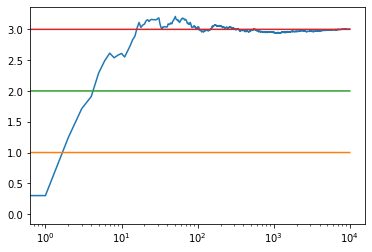

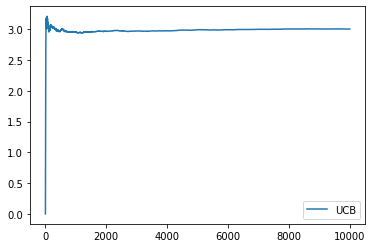

In [60]:
c_01 = run_experiment_ucb(1.0,2.0,3.0,10000,10)
matplotlib.pyplot.plot(c_01,label='UCB')
matplotlib.pyplot.legend()